<a href="https://colab.research.google.com/github/gopinathak-geek/Machine-Learning/blob/main/DeepLearning_FeedForward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Deep Learning Fully connected feed forward** 



In [2]:
import torch
import torchvision
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
training_data = MNIST(root='data', download=True, transform=transforms.ToTensor())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [4]:
testing_data = MNIST(root='data/', train=False, transform=transforms.ToTensor())

In [5]:
image, label = training_data[2]
print(image.shape, label)

torch.Size([1, 28, 28]) 4


In [6]:
print(f'Training data: {len(training_data)} | Testing data: {len(testing_data)}')

Training data: 60000 | Testing data: 10000


In [7]:
train_size = int(0.8 * len(training_data))
val_size = len(training_data) - train_size
training_data, validation_data = torch.utils.data.random_split(training_data, [train_size, val_size])

In [8]:
print(f'Training data: {len(training_data)} | validation data: {len(validation_data)} | Testing data: {len(testing_data)}')

Training data: 48000 | validation data: 12000 | Testing data: 10000


In [9]:
BATCH_SIZE = 126

In [10]:
training_loader = DataLoader(dataset=training_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=2, pin_memory=True)
validation_loader = DataLoader(dataset=validation_data, batch_size=120, shuffle=False, num_workers=2, pin_memory=True)

In [11]:
training_loader

In [12]:
class FeedForward(nn.Module):
  def __init__(self):
    super(FeedForward, self).__init__()
    self.layer_1 = nn.Linear(784, 1568)
    self.layer_2 = nn.Linear(1568, 784)
    self.layer_3 = nn.Linear(784, 392)
    self.layer_4 = nn.Linear(392, 10)
    self.relu = nn.ReLU()
    self.dropout = nn.Dropout(p=0.1)

  def forward(self, input):
    flatten_image = input.view(input.size(0), -1)
    out = self.layer_1(flatten_image)
    out = self.relu(out)
    out = self.dropout(out)
    out = self.layer_2(out)
    out = self.relu(out)
    out = self.dropout(out)
    out = self.layer_3(out)
    out = self.relu(out)
    out = self.dropout(out)
    out = self.layer_4(out)
    return out




In [13]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [14]:
model = FeedForward()
model.to(device)
print(model)

FeedForward(
  (layer_1): Linear(in_features=784, out_features=1568, bias=True)
  (layer_2): Linear(in_features=1568, out_features=784, bias=True)
  (layer_3): Linear(in_features=784, out_features=392, bias=True)
  (layer_4): Linear(in_features=392, out_features=10, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
)


In [15]:
def accuracy(predictions, labels):
  _, preds = torch.max(predictions, dim=1)
  return torch.tensor(torch.sum(preds == labels).item()/len(preds))

In [16]:
EPOCHS = 2
LEARNING_RATE = 0.001
criterion = nn.BCEWithLogitsLoss()

optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE)

for epoch in range(EPOCHS):
  for image, label in training_loader:
    image, label = image.to(device), label.to(device)
    pred_label = model(image)
    loss = F.cross_entropy(pred_label, label)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    #print(loss.item())
  
  for image, laabel in validation_loader:
    image, label = image.to(device), label.to(device)
    pred_label = model(image)
    loss = F.cross_entropy(pred_label, label)
    acc = accuracy(pred_label, label)

    print(acc)


tensor(0.1167)
tensor(0.1333)
tensor(0.1167)
tensor(0.1000)
tensor(0.1333)
tensor(0.1333)
tensor(0.1333)
tensor(0.0917)
tensor(0.1167)
tensor(0.0833)
tensor(0.1167)
tensor(0.1083)
tensor(0.1000)
tensor(0.1250)
tensor(0.1500)
tensor(0.1167)
tensor(0.1333)
tensor(0.0833)
tensor(0.0917)
tensor(0.1250)
tensor(0.0833)
tensor(0.0750)
tensor(0.0917)
tensor(0.1500)
tensor(0.1000)
tensor(0.1000)
tensor(0.1083)
tensor(0.1250)
tensor(0.1417)
tensor(0.1417)
tensor(0.1083)
tensor(0.1000)
tensor(0.1250)
tensor(0.1250)
tensor(0.0667)
tensor(0.1417)
tensor(0.0833)
tensor(0.1083)
tensor(0.1333)
tensor(0.1083)
tensor(0.1083)
tensor(0.1250)
tensor(0.0833)
tensor(0.0917)
tensor(0.1250)
tensor(0.1000)
tensor(0.0917)
tensor(0.1167)
tensor(0.1000)
tensor(0.1083)
tensor(0.1000)
tensor(0.0917)
tensor(0.0750)
tensor(0.1083)
tensor(0.0833)
tensor(0.0917)
tensor(0.1000)
tensor(0.0833)
tensor(0.0917)
tensor(0.0583)
tensor(0.1000)
tensor(0.1083)
tensor(0.1417)
tensor(0.0583)
tensor(0.1333)
tensor(0.1250)
tensor(0.0

In [17]:
def predict_image(img, model):
  xb = img.unsqueeze(0).to(device)
  yb = model(xb)
  _, preds = torch.max(yb, dim=1)
  return preds[0].item()

label: 7 ,predicted: 1


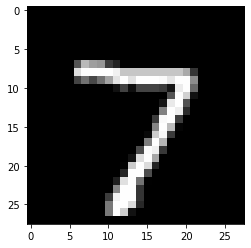

In [20]:
img, label = testing_data[0]
plt.imshow(img[0], cmap='gray')
print('label:', label, ',predicted:', predict_image(img, model))

In [27]:
img, label = testing_data[0]
xb = img.unsqueeze(0).to(device)
yb = model(xb)
print(yb)
_, preds = torch.max(yb, dim=1)
print(_)
print(preds)


tensor([[-0.0105,  0.0438,  0.0054,  0.0078,  0.0042,  0.0181,  0.0259, -0.0063,
          0.0533, -0.0114]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([0.0533], device='cuda:0', grad_fn=<MaxBackward0>)
tensor([8], device='cuda:0')
